In [1]:
"""
Name: con_tracing.ipynb
Authors: Stephan Meighen-Berger, Andrea Turcati
Example for the tracing of the infection spread
"""
%load_ext autoreload
%autoreload 2

In [2]:
 # General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import savgol_filter
from tqdm import tqdm
import pandas as pd
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [3]:
# Adding path to module
sys.path.append("../")
# picture path
PICS = '../pics/'

In [4]:
# Module imports
from contagion import Contagion, config

In [5]:
# Options
config["infected"] = 1
config["simulation length"] = 100
config["average social circle"] = 10
config["population size"] = 1000
config['trace spread'] = True
config["random state"] = np.random.RandomState(1337)

In [6]:
# Creating a contagion object
contagion = Contagion()

In [7]:
 # Storing the solutions
contagion.sim()
stats = pd.DataFrame(contagion.statistics)

In [8]:
stats

,is_removed,is_incubation,is_latent,is_infectious,is_infected,can_infect,is_hospitalized,is_recovered,is_dead
0,0,0,2,1,3,1,0,0,0
1,1,0,6,0,7,1,0,0,0
2,1,0,9,0,10,1,0,0,0
3,1,0,10,0,11,1,0,0,0
4,1,0,11,0,12,1,0,0,0
...,...,...,...,...,...,...,...,...,...
95,1000,0,0,0,0,0,0,994,31
96,1000,0,0,0,0,0,0,994,31
97,1000,0,0,0,0,0,0,994,31
98,1000,0,0,0,0,0,0,994,31


In [9]:
# Constructing the graph
t_s = contagion.trace_spread  # The spread array
gr = nx.Graph()  # Graph object
nodes = range(config['population size'])  # np.unique(np.squeeze(np.hstack([i for i in t_s])).flatten())  # Nodes
edges = np.squeeze(np.hstack([i for i in t_s])).tolist()  # Edges
# Adding edges and nodes
gr.add_nodes_from(nodes)
gr.add_edges_from(edges)

In [10]:
# Plotting standards
std_size = 10.
fontsize = 15.
lw=3.
h_length=1.

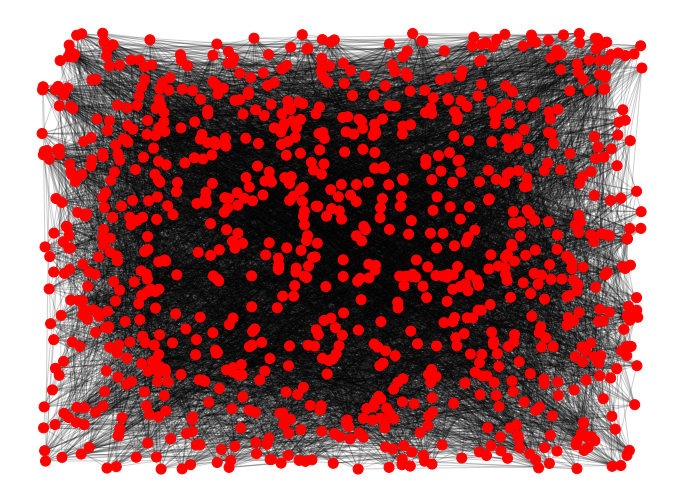

In [11]:
colors = ['b' if gr.degree(n) < 2 else 'r' for n in nodes]
fig, ax = plt.subplots(figsize=(12,9))
pos = nx.random_layout(gr)  # nx.circular_layout(gr) # nx.spring_layout(gr)
ec = nx.draw_networkx_edges(gr, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(gr, pos, nodelist=nodes, node_color=colors, 
                            with_labels=False, node_size=100)
ax.axis('off')
plt.show()

In [12]:
fig.savefig(PICS+'Contagion_Tracing.png')

In [13]:
# Animation stack
fontsize = 15.
# The frames are created in a loop
time_steps = 20
# The layout
gr = nx.Graph()
nodes = range(config['population size'])  # np.unique(np.squeeze(np.hstack([i for i in t_s])).flatten())  # Nodes
gr.add_nodes_from(nodes)
pos = nx.random_layout(gr)  # nx.circular_layout(gr) # nx.spring_layout(gr)
for i in range(time_steps):
    # Constructing the graph
    t_s = contagion.trace_spread[:i+3]  # The spread array
    gr = nx.Graph()  # Graph object
    edges = np.squeeze(np.hstack([i for i in t_s])).tolist()  # Edges
    # Adding edges and nodes
    gr.add_nodes_from(nodes)
    gr.add_edges_from(edges)
    # Plotting
    colors = ['b' if gr.degree(n) < 2 else 'r' for n in nodes]
    fig, ax = plt.subplots(figsize=(12,9))
    ec = nx.draw_networkx_edges(gr, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(gr, pos, nodelist=nodes, node_color=colors, 
                                with_labels=False, node_size=100)
    ax.axis('off')
    fig.savefig(PICS + '\\Frames\\frame_%d.png' %i)
    plt.close(fig)

In [14]:
import imageio
images = []
filenames = np.array([
    PICS + 'Frames\\frame_%d.png' %i
    for i in range(time_steps)
])
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(PICS + 'Spread.gif',
                images, duration=0.4)